In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import sys,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
from itertools import groupby
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
from scipy.stats import ttest_rel,ttest_ind
from scipy.stats import chisquare,chi2_contingency
sns.set_style("white")

Chi square tests were done in R

# Load the survey results

In [3]:
colnames=['Finished','p2p_Filter1','p2p_dem_Gender','p2p_dem__birth','p2p_dem_househ_sit','p2p_dem_househ_size',
          'p2p_dem_househ_kids','p2p_dem_activity','p2p_dem_activity_1_TEXT','p2p_dem_activity_3_TEXT',
          'p2p_dem_activity_4_TEXT','p2p_dem_educ','p2p_dem_politics','P2P_Values_Env_1','P2P_Values_Env_2',
          'P2P_Values_Env_3','P2P_Values_Env_4','P2P_Values_Env_5','p2p_dem2_energy','p2p_dem2_roof',
          'p2p_dem2_roof_3_TEXT','p2p_dem2_space_1','p2p_dem2_levels','p2p_dem3_PV','p2p_dem3_PV_power_1',
          'p2p_dem3_ESS','p2p_dem3_stroage_cap_1','p2p_dem3_technology_1','p2p_dem3_technology_2',
          'p2p_dem3_technology_3','p2p_dem3_technology_4','p2p_check_forecast','p2p_check_forecast2',
          'p2p_willingness','p2p_dec_4c30S_12h','p2p_dec_4c60S_12h','p2p_dec_4c90S_12h','p2p_dec_12c30S_12h',
          'p2p_dec_12c60S_12h','p2p_dec_12c90S_12h','p2p_dec_20c30S_12h','p2p_dec_20c60S_12h','p2p_dec_20c90S_12h',
          'p2p_dec_28c30S_12h','p2p_dec_28c60S_12h','p2p_dec_28c90S_12h','p2p_dec_check1','p2p_dec_4c30s_12h+',
          'p2p_dec_4c60s_12h+','p2p_dec_4c90s_12h+','p2p_dec_12c30s_12h+','p2p_dec_12c60s_12h+','p2p_dec_12c90s_12h+',
          'p2p_dec_20c30s_12h+','p2p_dec_20c60s_12h+','p2p_dec_20c90s_12h+','p2p_dec_28c30s_12h+','p2p_dec_28c60s_12h+',
          'p2p_dec_28c90s_12h+','p2p_dec_check2','p2p_DecMod_1','p2p_DecMod_2','p2p_DecMod_3','p2p_DecMod_4',
          'p2p_Degree_Autonomy','p2p_Willing_particip_2','p2p_Eval_1','p2p_willingn_reasons_1','p2p_willingn_reasons_2',
          'p2p_willingn_reasons_3','p2p_willingn_reasons_4','p2p_willingn_reasons_5','p2p_willingn_reasons_6',
          'p2p_willingn_reasons_7','p2p_willingn_reasons_8','p2p_willingn_reasons_9','p2p_willingn_reasons_10',
          'p2p_willingn_reasons_11','p2p_willingn_reasons_12','p2p_willingn_reasons_13','p2p_willingn_reasons_14',
          'p2p_willingn_reasons_15','p2p_willingn_reasons_15_TEXT','p2p_Willingn_comment','p2p_Nei_Pol',
          'p2p_Nei_attach_1','p2p_Nei_attach_2','p2p_Nei_attach_3','p2p_Nei_attach_6','p2p_Emo_Nei_1','p2p_Emo_Nei_2',
          'p2p_dem4_risk','p2p_Nei_attach_1.0','p2p_Nei_attach_2.0','P2P_CC_Emo_1','P2P_CC_Emo_2','P2P_CC_Emo_3',
          'P2P_CC_Emo_4','P2P_CC_Emo_5','P2P_CC_Emo_6','P2P_CC_Emo_7','P2P_CC_Emo_8','P2P_CC_Emo_9','P2P_CC_Emo_10']

In [4]:
df=pd.read_csv('P2P_Data_Germany_March2020_completes_200314_final.csv',usecols=colnames)

In [5]:
df.shape

(251, 104)

In [6]:
df=df.reset_index(drop=True)

In [7]:
df.head()

,Finished,p2p_Filter1,p2p_dem_Gender,p2p_dem__birth,p2p_dem_househ_sit,p2p_dem_househ_size,p2p_dem_househ_kids,p2p_dem_activity,p2p_dem_activity_1_TEXT,p2p_dem_activity_3_TEXT,...,P2P_CC_Emo_1,P2P_CC_Emo_2,P2P_CC_Emo_3,P2P_CC_Emo_4,P2P_CC_Emo_5,P2P_CC_Emo_6,P2P_CC_Emo_7,P2P_CC_Emo_8,P2P_CC_Emo_9,P2P_CC_Emo_10
0,1,1,1,68,3,2,1,4,,,...,5,1,6,1,6,2,5,2,4,6
1,1,1,1,48,2,2,1,4,,,...,7,1,2,1,4,3,1,2,2,1
2,1,1,2,58,1,4,1,3,,,...,3,1,2,2,2,2,2,4,4,2
3,1,1,2,42,3,2,1,3,,gf,...,4,6,4,3,5,5,3,4,4,4
4,1,1,1,72,2,2,1,3,,Immobilienkauffrau,...,5,2,5,3,5,3,5,4,5,3


# To normalize or not to normalize?

In [8]:
norm=True

In [9]:
def serie_map(serie,to_map):
    serie.index=serie.index.map(to_map)
    return serie

In [10]:
dict_pol=dict(zip(np.arange(1,11), ['Extreme left','2','3','4','Center','6','7','8','9','Extreme right']))
dict_rel=dict(zip(np.arange(1,6), ['Single','Relationship','Married','Divorced','Widow']))
dict_sit=dict(zip(np.arange(1,6),['Student','Unemployed ','Full-time work','Part-time','Pensioner']))
dict_edu=dict(zip(np.arange(1,7),['Secondary','Realschule','Abitur','Bachelor','Master','PhD']))
dict_gend=dict(zip(np.arange(1,3),['Female','Male']))

dict_likert_imp=dict(zip(np.arange(0,9),['Contrary to my\nguiding principles','Not at all important','Low importance',
                                         'Slightly important','Neutral','Moderately important','Very important',
                                         'Extremely important','Paramount']))
dict_ener=dict(zip(np.arange(1,5),['Fossil','Renewable','both','NA']))
dict_roof=dict(zip(np.arange(1,4),['Slope','Flat','Other']))
dict_tf=dict(zip(np.arange(1,3),['Yes','No']))
dict_likert_int=dict(zip(np.arange(1,6),['Extremely unlikely','Unlikely','Neutral','Likely','Extremely likely']))
dict_likert_agr=dict(zip(np.arange(1,8),['Strongly disagree','Disagree','Somewhat disagree','Neither agree or disagree',
                                         'Somewhat agree','Agree','Strongly agree ']))
dict_sell=dict(zip(np.arange(1,3),['Sell','Store']))
dict_risk=dict(zip(np.arange(1,11), ['Totally averse','2','3','4','5','6','7','8','9','Risk taker']))

# Socio-demographics 

In [11]:
176/251

0.701195219123506

In [12]:
df.loc[df.p2p_willingness==1].shape

(176, 104)

In [13]:
df.loc[df.p2p_willingness==2].shape

(75, 104)

In [15]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_Gender==1),'p2p_dem_Gender'].count()/176) # women participating
print(df.loc[(df.p2p_willingness==2) & (df.p2p_dem_Gender==1),'p2p_dem_Gender'].count()/75) # women not part

0.5056818181818182
0.5866666666666667


In [16]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_Gender'].apply(lambda x:list(x)))[1]<0.001)
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_Gender'].apply(lambda x:list(x)))[1]<0.01)
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_Gender'].apply(lambda x:list(x)))[1]<0.05)

False
False
False


## Age (the numbers are the year of birth so we need to transform to the age doing 101-p2p_dem__birth) 

In [17]:
print(101-df.loc[(df.p2p_willingness==1),'p2p_dem__birth'].mean())
print(101-df.loc[(df.p2p_willingness==2),'p2p_dem__birth'].mean())

51.57954545454545
55.04


In [18]:
print(101-df.loc[(df.p2p_willingness==1),'p2p_dem__birth'].median())
print(101-df.loc[(df.p2p_willingness==2),'p2p_dem__birth'].median())

54.5
60.0


In [19]:
print(101-df.loc[:,'p2p_dem__birth'].median())

55.0


In [20]:
print(101-df.loc[:,'p2p_dem__birth'].mean())

52.613545816733065


In [21]:
print(df.loc[:,'p2p_dem__birth'].std())
print(df.loc[(df.p2p_willingness==1),'p2p_dem__birth'].std())
print(df.loc[(df.p2p_willingness==2),'p2p_dem__birth'].std())

14.32166386202708
14.761123914552687
13.005653656276836


In [22]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem__birth'].apply(lambda x:list(x))))


Ttest_indResult(statistic=1.759554725698209, pvalue=0.07971136167069845)


## Civil status

In [23]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==1),'p2p_dem_househ_sit'].count()/176*100) # single participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==2),'p2p_dem_househ_sit'].count()/176*100) # rltshp participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==3),'p2p_dem_househ_sit'].count()/176*100) # married participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==4),'p2p_dem_househ_sit'].count()/176*100) # divorced participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==5),'p2p_dem_househ_sit'].count()/176*100) # widow participating


18.181818181818183
16.477272727272727
54.54545454545454
5.113636363636364
5.681818181818182


In [24]:
print(df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==1),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==2),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==3),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==4),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==5),'p2p_dem_househ_sit'].count())


8
11
50
4
2


In [23]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==1),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==2),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==3),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==4),'p2p_dem_househ_sit'].count())
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==5),'p2p_dem_househ_sit'].count())


32
29
96
9
10


In [168]:
df.loc[:,['p2p_willingness','p2p_dem_househ_sit','p2p_dem_activity', 'p2p_dem_educ','p2p_dem2_energy']].to_csv('chi2.csv')

In [166]:
cont_1=[[32,8],[29,11],[96,50],[9,4],[10,2]]

In [167]:
cont_1

[[32, 8], [29, 11], [96, 50], [9, 4], [10, 2]]

In [158]:
chi2, p, dof, expected=chi2_contingency(cont_1)
print('chi2 {}'.format(chi2) )
print('p {}'.format(p) )
print('dof {}'.format(dof) )
print('expected {}'.format(expected) )

chi2 4.305219486088492
p 0.36627196660911904
dof 4
expected [[ 28.04780876  11.95219124]
 [ 28.04780876  11.95219124]
 [102.37450199  43.62549801]
 [  9.11553785   3.88446215]
 [  8.41434263   3.58565737]]


In [165]:
df.to_excel('to_R.xlsx')

In [162]:
df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==1),'p2p_dem_househ_sit']

2      1
12     1
14     1
15     1
17     1
21     1
24     1
30     1
39     1
41     1
64     1
68     1
75     1
83     1
85     1
152    1
161    1
179    1
194    1
196    1
198    1
201    1
204    1
209    1
215    1
229    1
233    1
235    1
236    1
240    1
241    1
245    1
Name: p2p_dem_househ_sit, dtype: int64

In [159]:
print(chisquare(*df.groupby('p2p_willingness')['p2p_dem_househ_sit'].count()))


Power_divergenceResult(statistic=136.01333333333332, pvalue=nan)


In [161]:
df.groupby('p2p_willingness')['p2p_dem_househ_sit'].count()

p2p_willingness
1    176
2     75
Name: p2p_dem_househ_sit, dtype: int64

In [137]:
ttest_ind(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==2),'p2p_dem_househ_sit'],
          df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==2),'p2p_dem_househ_sit'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [138]:
ttest_ind(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==3),'p2p_dem_househ_sit'],
          df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==3),'p2p_dem_househ_sit'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [139]:
ttest_ind(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==4),'p2p_dem_househ_sit'],
          df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==4),'p2p_dem_househ_sit'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [140]:
ttest_ind(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==5),'p2p_dem_househ_sit'],
          df.loc[(df.p2p_willingness==2) & (df.p2p_dem_househ_sit==5),'p2p_dem_househ_sit'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [142]:
df.loc[(df.p2p_willingness==1) & (df.p2p_dem_househ_sit==1),'p2p_dem_househ_sit']
          

2      1
12     1
14     1
15     1
17     1
21     1
24     1
30     1
39     1
41     1
64     1
68     1
75     1
83     1
85     1
152    1
161    1
179    1
194    1
196    1
198    1
201    1
204    1
209    1
215    1
229    1
233    1
235    1
236    1
240    1
241    1
245    1
Name: p2p_dem_househ_sit, dtype: int64

In [84]:
print(ttest_ind(*df.groupby(['p2p_dem_househ_sit','p2p_willingness'])['p2p_dem_househ_sit'].apply(lambda x:list(x))[4:6]))

Ttest_indResult(statistic=nan, pvalue=nan)


In [62]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_househ_sit'].apply(lambda x:list(x))))

Ttest_indResult(statistic=-0.8270646936446917, pvalue=0.40899227075761124)


In [68]:
ttest_ind(*df.loc[(df.p2p_dem_househ_sit==3)].groupby('p2p_willingness')['p2p_dem_househ_sit'].apply(lambda x:list(x)))

Ttest_indResult(statistic=nan, pvalue=nan)

In [92]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_activity==1),'p2p_dem_activity'].count()/176*100) # student participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_activity==2),'p2p_dem_activity'].count()/176*100) # unempl participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_activity==3),'p2p_dem_activity'].count()/176*100) # full participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_activity==4),'p2p_dem_activity'].count()/176*100) # part participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_activity==5),'p2p_dem_activity'].count()/176*100) # pensioner participating


4.382470119521913
4.382470119521913
30.677290836653388
17.131474103585656
13.545816733067728


In [93]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_educ==1),'p2p_dem_educ'].count()/251*100) # Secondary participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_educ==2),'p2p_dem_educ'].count()/251*100) # Realschule participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_educ==3),'p2p_dem_educ'].count()/251*100) # Abitur participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_educ==4),'p2p_dem_educ'].count()/251*100) # bachelor participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_educ==5),'p2p_dem_educ'].count()/251*100) # master participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem_educ==6),'p2p_dem_educ'].count()/251*100) # phd participating


5.179282868525896
22.31075697211155
16.334661354581673
5.577689243027888
18.725099601593627
1.9920318725099602


# Household members

In [95]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem_househ_size'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem_househ_size'].mean())

2.5681818181818183
2.3866666666666667


In [97]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_househ_size'].apply(lambda x:list(x))))

Ttest_indResult(statistic=1.1972977047664741, pvalue=0.2323291174829949)


# Energy mix

In [99]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem2_energy==1),'p2p_dem2_energy'].count()/251*100) # fossil participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem2_energy==2),'p2p_dem2_energy'].count()/251*100) # renew participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem2_energy==3),'p2p_dem2_energy'].count()/251*100) # both participating
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem2_energy==4),'p2p_dem2_energy'].count()/251*100) # na participating


6.374501992031872
19.52191235059761
25.099601593625497
19.12350597609562


In [100]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem3_PV==1),'p2p_dem3_PV'].count()/251*100) # fossil participating


12.350597609561753


In [ ]:
print(df.loc[(df.p2p_willingness==1) & (df.p2p_dem3_technology_1==1),'p2p_dem3_technology_1'].count()/251*100) # fossil participating


In [102]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_1'].apply(lambda x:list(x))))
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_2'].apply(lambda x:list(x))))
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_3'].apply(lambda x:list(x))))
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_4'].apply(lambda x:list(x))))

Ttest_indResult(statistic=3.9314484809162042, pvalue=0.00010948817229586831)
Ttest_indResult(statistic=5.886808125194528, pvalue=1.2669736714403417e-08)
Ttest_indResult(statistic=6.156793845243725, pvalue=2.954097010856598e-09)
Ttest_indResult(statistic=3.800038730206685, pvalue=0.00018193143892957815)


# EV

In [104]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem3_technology_1'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem3_technology_1'].mean())

2.3068181818181817
1.64


In [109]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_1'].apply(lambda x:list(x))))

Ttest_indResult(statistic=3.9314484809162042, pvalue=0.00010948817229586831)


# PV

In [105]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem3_technology_2'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem3_technology_2'].mean())

2.7329545454545454
1.7066666666666668


In [110]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_2'].apply(lambda x:list(x))))

Ttest_indResult(statistic=5.886808125194528, pvalue=1.2669736714403417e-08)


# BESS

In [106]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem3_technology_3'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem3_technology_3'].mean())

2.835227272727273
1.8


In [111]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_3'].apply(lambda x:list(x))))

Ttest_indResult(statistic=6.156793845243725, pvalue=2.954097010856598e-09)


# HP

In [107]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem3_technology_4'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem3_technology_4'].mean())

2.465909090909091
1.7866666666666666


In [112]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem3_technology_4'].apply(lambda x:list(x))))

Ttest_indResult(statistic=3.800038730206685, pvalue=0.00018193143892957815)


# Political

In [121]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem_politics'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem_politics'].mean())

5.125
5.4


In [122]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem_politics'].apply(lambda x:list(x))))

Ttest_indResult(statistic=-1.4558204552521559, pvalue=0.14670191473810928)


# Risk

In [123]:
print(df.loc[(df.p2p_willingness==1),'p2p_dem4_risk'].mean())
print(df.loc[(df.p2p_willingness==2),'p2p_dem4_risk'].mean())

5.704545454545454
4.773333333333333


In [124]:
print(ttest_ind(*df.groupby('p2p_willingness')['p2p_dem4_risk'].apply(lambda x:list(x))))

Ttest_indResult(statistic=2.8792044706171107, pvalue=0.0043335152310939595)


# Earth

In [125]:
print(df.loc[(df.p2p_willingness==1),'P2P_Values_Env_1'].mean())
print(df.loc[(df.p2p_willingness==2),'P2P_Values_Env_1'].mean())

6.306818181818182
5.906666666666666


In [126]:
print(ttest_ind(*df.groupby('p2p_willingness')['P2P_Values_Env_1'].apply(lambda x:list(x))))

Ttest_indResult(statistic=1.8666200044114323, pvalue=0.06313002800180409)


# Unity nature

In [127]:
print(df.loc[(df.p2p_willingness==1),'P2P_Values_Env_2'].mean())
print(df.loc[(df.p2p_willingness==2),'P2P_Values_Env_2'].mean())

6.079545454545454
5.56


In [128]:
print(ttest_ind(*df.groupby('p2p_willingness')['P2P_Values_Env_2'].apply(lambda x:list(x))))

Ttest_indResult(statistic=2.2259582480425615, pvalue=0.026912593397430615)


# Environmental protection

In [129]:
print(df.loc[(df.p2p_willingness==1),'P2P_Values_Env_3'].mean())
print(df.loc[(df.p2p_willingness==2),'P2P_Values_Env_3'].mean())

6.579545454545454
5.8133333333333335


In [130]:
print(ttest_ind(*df.groupby('p2p_willingness')['P2P_Values_Env_3'].apply(lambda x:list(x))))

Ttest_indResult(statistic=3.633586129377866, pvalue=0.0003394475774445137)


# Pollution

In [131]:
print(df.loc[(df.p2p_willingness==1),'P2P_Values_Env_4'].mean())
print(df.loc[(df.p2p_willingness==2),'P2P_Values_Env_4'].mean())

6.4147727272727275
5.96


In [132]:
print(ttest_ind(*df.groupby('p2p_willingness')['P2P_Values_Env_4'].apply(lambda x:list(x))))

Ttest_indResult(statistic=2.169118097292735, pvalue=0.031020343248571607)


In [15]:
df_bhv=pd.read_csv('table_bhv.csv', index_col=0)

In [21]:
df_bhv.head()

,Price,SOC,surplus_time,hh,sell,will
0,4.0,30.0,12h,0,False,False
1,4.0,30.0,12h,1,False,True
2,4.0,30.0,12h,2,False,True
3,4.0,30.0,12h,3,False,True
4,4.0,30.0,12h,4,True,True


In [22]:
df_bhv.dtypes

Price           float64
SOC             float64
surplus_time     object
hh                int64
sell               bool
will               bool
dtype: object

In [28]:
df_bhv[df_bhv.will==True].shape

(4224, 6)

In [31]:
df_bhv[df_bhv.will==True].groupby(['Price','SOC','surplus_time']).sum().sell

Price  SOC   surplus_time
4.0    30.0  12h              17.0
             12h+             11.0
       60.0  12h              45.0
             12h+             30.0
       90.0  12h              90.0
             12h+             67.0
12.0   30.0  12h              40.0
             12h+             20.0
       60.0  12h              91.0
             12h+             64.0
       90.0  12h             137.0
             12h+            122.0
20.0   30.0  12h              58.0
             12h+             34.0
       60.0  12h             131.0
             12h+            102.0
       90.0  12h             160.0
             12h+            157.0
28.0   30.0  12h              75.0
             12h+             43.0
       60.0  12h             147.0
             12h+            121.0
       90.0  12h             165.0
             12h+            153.0
Name: sell, dtype: float64

In [34]:
df_bhv[(df_bhv.will==True)&(df_bhv.surplus_time=='12h')].groupby(['Price','SOC']).sum().sell.sum()

1156.0

In [39]:
176*4*3*2

4224

Text(0, 0.5, 'Selling probability')

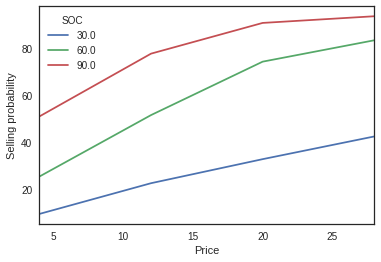

In [60]:
(df_bhv[(df_bhv.will==True)&(df_bhv.surplus_time=='12h')].groupby(['Price','SOC']).sum().sell.unstack()/176*100).plot()
plt.xlabel('Price []')
plt.ylabel('Selling probability')

In [46]:
(df_bhv[(df_bhv.will==True)&(df_bhv.surplus_time=='12h')].groupby(['Price','SOC']).sum().sell.unstack()/176)

SOC,30.0,60.0,90.0
Price,,,
4.0,0.096591,0.255682,0.511364
12.0,0.227273,0.517045,0.778409
20.0,0.329545,0.744318,0.909091
28.0,0.426136,0.835227,0.937500


In [57]:
(df_bhv[(df_bhv.will==True)&(df_bhv.surplus_time=='12h')].groupby(['Price','SOC']).sum().sell.unstack()/176).sum()

SOC
30.0    1.079545
60.0    2.352273
90.0    3.136364
dtype: float64

In [58]:
(df_bhv[(df_bhv.will==True)&(df_bhv.surplus_time=='12h')].groupby(['Price','SOC']).sum().sell.unstack()/176).sum(axis=1)

Price
4.0     0.863636
12.0    1.522727
20.0    1.982955
28.0    2.198864
dtype: float64

In [56]:
df_bhv[(df_bhv.will==True)].groupby(['Price','SOC','surplus_time']).sum().sell.unstack()

surplus_time    12h   12h+
Price SOC                 
4.0   30.0     17.0   11.0
      60.0     45.0   30.0
      90.0     90.0   67.0
12.0  30.0     40.0   20.0
      60.0     91.0   64.0
      90.0    137.0  122.0
20.0  30.0     58.0   34.0
      60.0    131.0  102.0
      90.0    160.0  157.0
28.0  30.0     75.0   43.0
      60.0    147.0  121.0
      90.0    165.0  153.0